<a href="https://colab.research.google.com/github/Ptuancuong/TH1-Train.csv/blob/main/Train_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
df = pd.read_csv('/content/train.csv')
df.head(10)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
5,5,Fitness First,Episode 19,26.54,Health,48.96,Saturday,Afternoon,NaN,3.0,Positive,22.77047
6,6,Criminal Minds,Episode 47,69.83,True Crime,35.82,Sunday,Night,39.02,0.0,Neutral,64.75024
7,7,News Roundup,Episode 44,48.52,News,44.99,Thursday,Night,20.12,0.0,Positive,22.37517
8,8,Daily Digest,Episode 32,105.87,News,69.81,Monday,Evening,NaN,2.0,Neutral,68.00124
9,9,Music Matters,Episode 81,NaN,Music,82.18,Thursday,Night,59.72,3.0,Neutral,45.94761


In [4]:
a = (2251262584%7+1)
a

5

In [26]:
df_friday = df[df["Publication_Day"] == "Friday"]

df_monday.head(10)


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
31,31,Global News,Episode 92,118.15,News,86.22,Friday,Morning,64.88,2.0,Neutral,57.48380
34,34,Study Sessions,Episode 30,8.66,Education,49.75,Friday,Morning,NaN,3.0,Neutral,6.67525
35,35,Sport Spot,Episode 63,75.02,Sports,95.89,Friday,Night,59.71,0.0,Positive,40.33025
58,58,Sports Central,Episode 33,31.90,Sports,63.61,Friday,Evening,64.38,1.0,Negative,19.28000
83,83,Sports Central,Episode 80,25.34,Sports,53.30,Friday,Evening,NaN,3.0,Positive,23.71495
95,95,Mystery Matters,Episode 40,94.45,True Crime,53.37,Friday,Afternoon,36.36,0.0,Positive,66.59645
96,96,Home & Living,Episode 49,60.26,Lifestyle,34.26,Friday,Evening,51.18,1.0,Neutral,48.28618
107,107,Daily Digest,Episode 96,37.31,News,57.78,Friday,Afternoon,5.62,1.0,Neutral,9.77975
108,108,Tech Trends,Episode 78,85.12,Technology,62.19,Friday,Morning,9.00,2.0,Positive,58.26835
112,112,Lifestyle Lounge,Episode 38,84.42,Lifestyle,48.29,Friday,Morning,26.19,1.0,Neutral,50.90406


In [27]:
nan_per_column = df_friday.isnull().sum()
print(nan_per_column)


id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         12149
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    20732
Number_of_Ads                      1
Episode_Sentiment                  0
Listening_Time_minutes             0
dtype: int64


In [28]:
# Nội suy các giá trị số bị thiếu theo phương pháp tuyến tính
df_friday_interpolated = df_friday.interpolate(method='linear')

print(df_friday_interpolated.isnull().sum())


id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64


<ipython-input-28-ea4508e6b1d9>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_friday_interpolated = df_friday.interpolate(method='linear')


In [29]:
# Xóa các dòng còn chứa giá trị thiếu (NaN) sau khi nội suy
friday_df_cleaned = df_friday_interpolated.dropna()

# Kiểm tra lại số giá trị thiếu sau khi xóa
print(friday_df_cleaned.isna().sum())
print(f"Số dòng còn lại sau khi xóa: {len(friday_df_cleaned)}")

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64
Số dòng còn lại sau khi xóa: 108237


                          Unobserved Components Results                           
Dep. Variable:     Listening_Time_minutes   No. Observations:               108237
Model:                        local level   Log Likelihood             -511124.359
Date:                    Tue, 06 May 2025   AIC                        1022252.718
Time:                            08:12:51   BIC                        1022271.902
Sample:                                 0   HQIC                       1022258.519
                                 - 108237                                         
Covariance Type:                      opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular   740.0134      3.903    189.589      0.000     732.363     747.664
sigma2.level      1.828e-11   1.69e-06   1.08e-05      1.000   -3.31e-06    3.31e

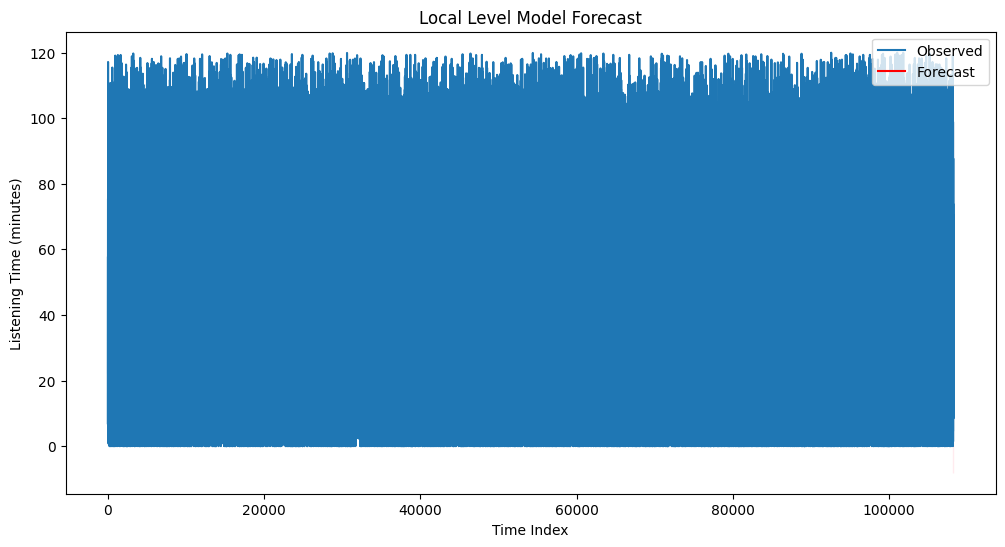

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents

# Đảm bảo cột thời gian (nếu có), hoặc dùng index giả định
friday_df_cleaned.reset_index(drop=True, inplace=True)

# Khởi tạo mô hình Local Level (level-only model)
model = UnobservedComponents(
    endog=friday_df_cleaned['Listening_Time_minutes'],
    level='local level'
)

# Fit mô hình với Kalman Filter
results = model.fit()

# Tóm tắt kết quả
print(results.summary())

# Dự báo (forecast) tiếp 10 bước
forecast = results.get_forecast(steps=10)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Vẽ kết quả
plt.figure(figsize=(12, 6))
plt.plot(friday_df_cleaned['Listening_Time_minutes'], label='Observed')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title("Local Level Model Forecast")
plt.xlabel("Time Index")
plt.ylabel("Listening Time (minutes)")
plt.show()

                          Unobserved Components Results                           
Dep. Variable:     Listening_Time_minutes   No. Observations:               108237
Model:                 local linear trend   Log Likelihood             -512398.799
Date:                    Tue, 06 May 2025   AIC                        1024803.599
Time:                            08:15:10   BIC                        1024832.375
Sample:                                 0   HQIC                       1024812.300
                                 - 108237                                         
Covariance Type:                      opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular   696.8557      0.000   3.43e+06      0.000     696.855     696.856
sigma2.level         1.4478      0.104     13.918      0.000       1.244       1.

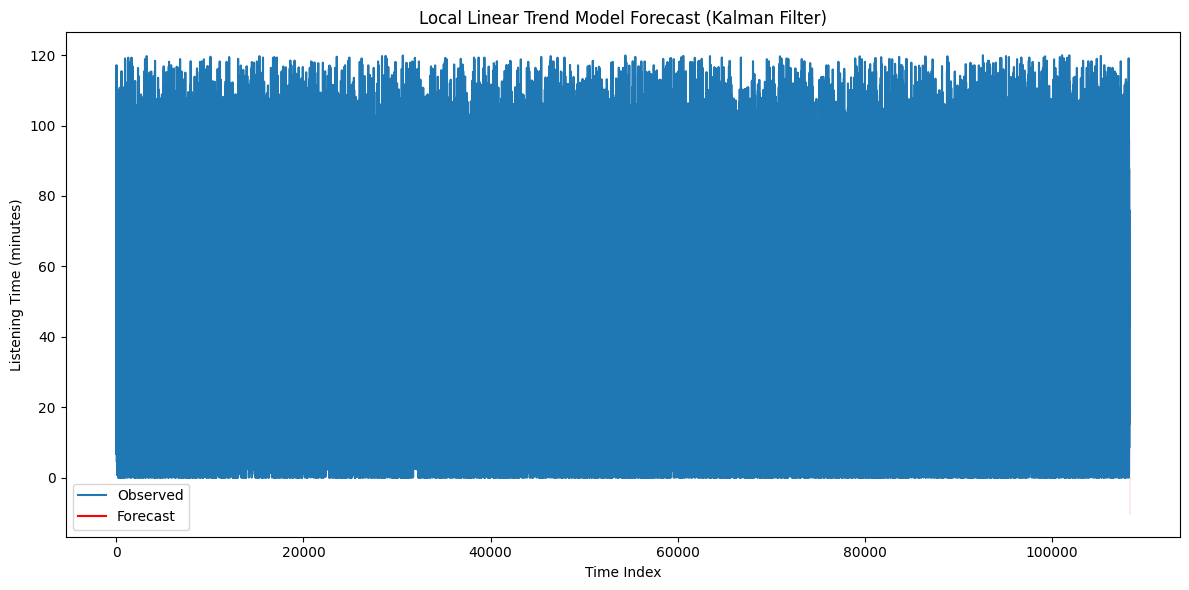

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents

# Đặt lại index để dùng như trục thời gian
friday_df_cleaned.reset_index(drop=True, inplace=True)

# Khởi tạo mô hình xu hướng tuyến tính cục bộ
model = UnobservedComponents(
    endog=friday_df_cleaned['Listening_Time_minutes'],
    level='local linear trend'
)

# Huấn luyện mô hình
results = model.fit()

# In tóm tắt kết quả
print(results.summary())

# Dự báo 10 bước tiếp theo
forecast = results.get_forecast(steps=10)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(friday_df_cleaned['Listening_Time_minutes'], label='Observed')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title("Local Linear Trend Model Forecast (Kalman Filter)")
plt.xlabel("Time Index")
plt.ylabel("Listening Time (minutes)")
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Unobserved Components Results                            
Dep. Variable:       Listening_Time_minutes   No. Observations:               108237
Model:                   local linear trend   Log Likelihood             -511143.434
                   + stochastic seasonal(7)   AIC                        1022294.869
Date:                      Tue, 06 May 2025   BIC                        1022333.237
Time:                              08:20:15   HQIC                       1022306.471
Sample:                                   0                                         
                                   - 108237                                         
Covariance Type:                        opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular   740.6314   1.06e-12   6.99e+14      0.000     

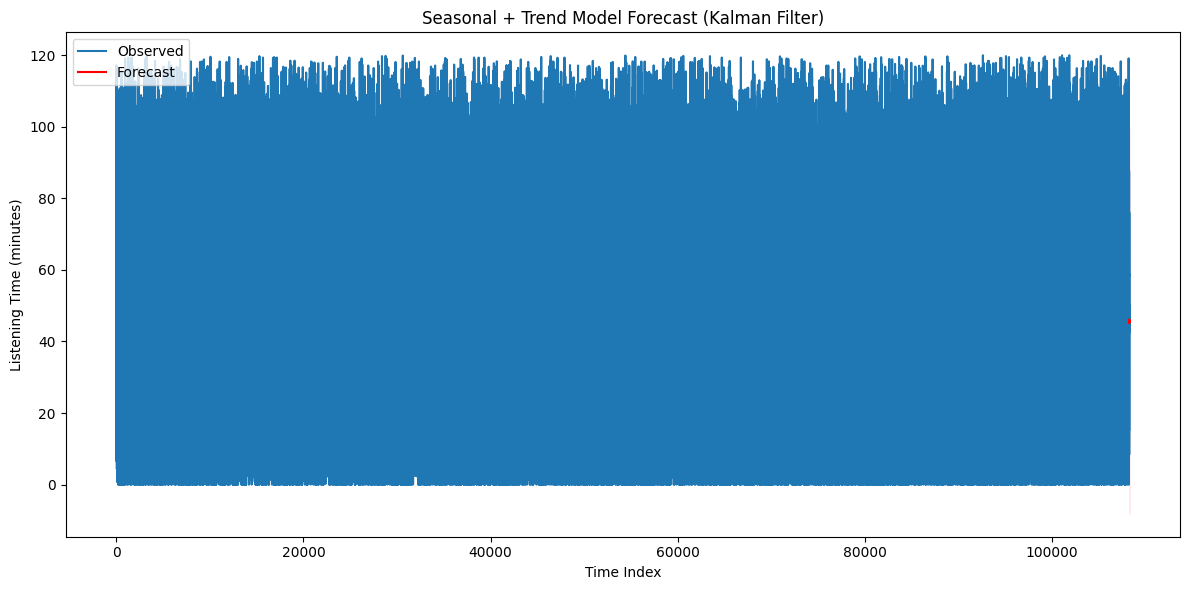

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents

# Đặt lại index để giả định là thời gian
friday_df_cleaned.reset_index(drop=True, inplace=True)

# Khởi tạo mô hình xu hướng + chu kỳ (seasonal)
model = UnobservedComponents(
    endog=friday_df_cleaned['Listening_Time_minutes'],
    level='local linear trend',
    seasonal=7  # giả định có chu kỳ hàng tuần (7 ngày)
)

# Huấn luyện mô hình với Kalman Filter
results = model.fit()

# In tóm tắt kết quả
print(results.summary())

# Dự báo 14 bước tiếp theo
forecast = results.get_forecast(steps=14)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Vẽ kết quả
plt.figure(figsize=(12, 6))
plt.plot(friday_df_cleaned['Listening_Time_minutes'], label='Observed')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_mean.index,
                 conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title("Seasonal + Trend Model Forecast (Kalman Filter)")
plt.xlabel("Time Index")
plt.ylabel("Listening Time (minutes)")
plt.legend()
plt.tight_layout()
plt.show()
